# Introducción a Python para ciencias e ingenierías (notebook 6)


Ing. Martín Gaitán

- Email: gaitan@gmail.com


## Seaborn

Antes de empezar con pandas vamos a configurar [Seaborn](http://stanford.edu/~mwaskom/software/seaborn/index.html), un paquete que, entre otras cosas, mejora la estética de gráficos de matplotlib

Para instalar, como casi siempre

    conda install seaborn
      
o 

    pip install seaborn
    

Veamos un gráfico default generado por matplotlib

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

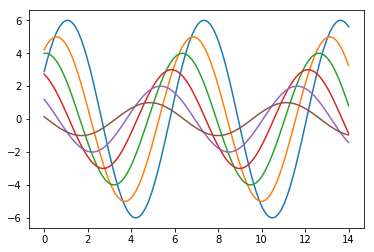

In [3]:
def sinplot():
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i))
        
sinplot()

/home/tin/.virtualenvs/curso/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


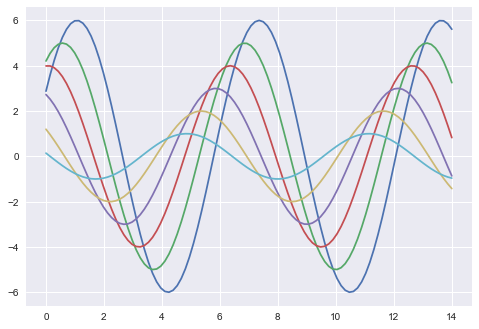

In [4]:
import seaborn as sns   # magia !
sinplot();

Seaborn permite configurar paletas, estilos de una manera muy fácil, globalmente o para un gráfico en particular

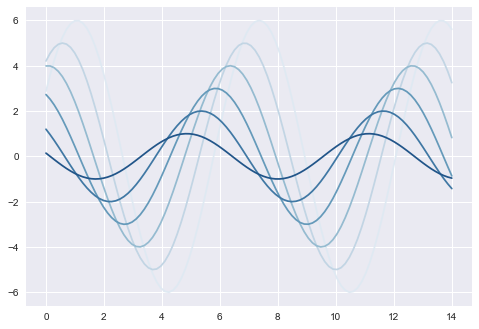

In [5]:
with sns.color_palette("Blues", desat=.7):
    sinplot()

Al ser un paquete especialmente diseñado para **estadística**, además de gráficos más lindos, tiene **gráficos especiales** e incorpora "datesets" de prueba

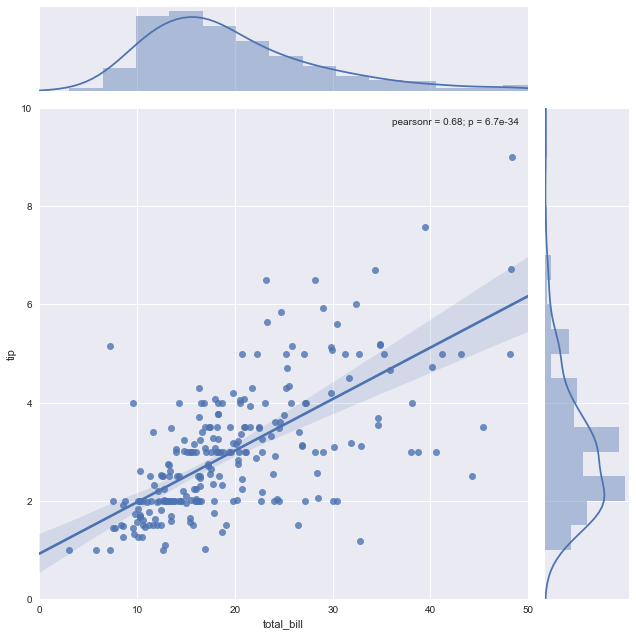

In [6]:
tips = sns.load_dataset("tips")
g = sns.jointplot("total_bill", "tip", data=tips, kind="reg", xlim=(0, 50), ylim=(0, 10), size=9)


¿Y qué ese dataset? Veamos

In [7]:
type(tips)

pandas.core.frame.DataFrame


## Pandas


[Pandas](http://pandas.pydata.org) es una biblioteca para manipulación y análisis de datos basada en Numpy. Aporta nuevas estructuras de datos de alto nivel que extienden datos almacenados en arrays, aportando más semántica y nuevas operaciones. 

Puede pensarse a Pandas como un **reemplazo pythonico a excel**


Pandas introduce dos estructuras de datos principales: `Series` y `DataFrame`.  


In [8]:
import pandas as pd

### Series

Un Series es un objeto **unidemensional**, similar a un array, una lista o una columna en una tabla, que tiene **asociado una etiqueta** para cada elemento. Por defecto, esta etiqueta es un número de 0 a N

In [9]:
s = pd.Series([1,3,5,np.nan,6,8]) # creamos una serie, analogo a un array de 1D
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [10]:
pd.Series?

Como vemos, es simplemente un envoltorio más lindo: el verdadero contenedor es un array de numpy

In [11]:
s.values

array([  1.,   3.,   5.,  nan,   6.,   8.])

In [20]:
s.values.ndim, s.values.shape

(1, (6,))

Si bien una serie se puede indizar directamente como una secuencia, la forma correcta y potente es utilizar los métodos especiales `loc` (basado en valor) e `iloc` (basado en posicion). 

In [17]:
s.index

RangeIndex(start=0, stop=6, step=1)

In [21]:
s.loc[0], s.iloc[0]

(1.0, 1.0)

¿Pero entonces una Serie es una secuencia?. En realidad es más parecido a un diccionario ordenado

In [22]:
s[0]

1.0

In [23]:
s[-1]

KeyError: -1

In [ ]:
s.ix[-1]

Hay muchas operaciones que podemos hacer sobre una serie.

In [ ]:
s.mean(), s.sum(), s.std()

E incluso ver un resumen general de los datos

In [ ]:
s.describe()

Como vemos, es un poco más permisivo que Numpy con los datos faltantes (ese `nan` que hay por allí)

In [ ]:
s.values.mean(), s.values.sum(), s.values.std()

Y hay operaciones que no están disponibles en numpy o se comportan distinto

In [ ]:
s.median()

In [ ]:
s.values.median() # np.median(s.values)

Pandas es una herramienta nacida en la industria de las finanzas, y por ello intenta hacer fácil las cosas tipicas. Una de ellas es **graficar datos**. Utiliza **matplotlib** por default

In [ ]:
s.plot()

Como dijimos, los valores de una serie tienen una etiqueta y se pueden definir explicitamente

In [ ]:
goles = pd.Series([10, 54, 31, 0], index=['gaitan', 'messi', 'suarez', 'ronaldo'])
goles

Cuando el índice no es de enteros, se puede buscar un valor tanto por clave como por posición (con reglas de slicing)

In [ ]:
goles['messi']

In [ ]:
goles[-1]

In [ ]:
goles.ix[1:-1]

Obviamente, dado que se trata de claves y valores, se puede instanciar una serie directamente desde un diccionario. 



In [ ]:
pd.Series({'gaitan': 80, 'messi': 100})

Pero a diferencia de un diccionario, las etiquetas se pueden repetir. Es decir que pueden haber multiples valores para una clave

In [ ]:
s = pd.Series(np.random.rand(4) * 100, ['gaitan', 'messi', 'maradona', 'messi'])
s['messi']

In [ ]:
s.plot('bar')

La series se utilizan mucho para representar datos en **función del tiempo**. Hay una función especial análoga a `range()` que permite generar índices temporales

In [ ]:
pd.date_range('1/1/2010', periods=1000)

In [ ]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2010', periods=1000))
ts = ts.cumsum()
ts.plot()

### Dataframe

Un DataFrame es una estructura tabular de **filas y columnas** (¡como una hoja de cálculo!). También se puede pensar un DataFrame como un conjunto de Series que comparten el índice (es decir, la primera columna)

In [ ]:
df = pd.DataFrame(np.random.randn(1000,4), index=ts.index, columns=list('ABCD'))
df.head()

In [ ]:
df.tail()

Las columnas son Series!

In [ ]:
type(df.A)

In [ ]:
df["A"].cumsum().plot()

Se puede instanciar un DataFrame a partir de un diccionario. 

In [ ]:
df2 = pd.DataFrame({ 'A': 1.,
                     'B': pd.Timestamp('20130102'),
                     'C': pd.Series(1, index=range(4),dtype='float32'),
                     'D': np.array([3, 2, 1, .9]),
                     'E': 'foo' })
df2

In [ ]:
df2[['B','C']]

In [ ]:
import pickle

pickle.loads(pickle.dumps(df2))

Pandas tambien puede importar archivos CSV o Excel, locales o remotos. Por ejemplo este [dataset](https://github.com/rjtavares/football-crunching/blob/master/datasets/cl-shots-2012.csv) de remates al arco en la Champions League

In [ ]:
url = 'https://raw.githubusercontent.com/rjtavares/football-crunching/master/datasets/cl-shots-2012.csv'
shots = pd.read_csv(url, index_col=0, na_values='N/A')

In [ ]:
shots.columns

In [ ]:
shots.head()

Podemos filtrar el dataset por múltiples criterios. Por ejemplo, para calcular la distancia promedio de los goles que hizo el genio:

In [ ]:
shots[(shots.player == 'Lionel Messi') & shots.goal].dist.mean()

Podemos separar subconjuntos basado en uno o más criterios

In [ ]:
shots.groupby('team').describe()

In [ ]:
shots.groupby(['team', 'goal']).dist.mean()

Una alternativa aún más poderosa es hacer un pivot de datos, donde se definen una o múltples filas y columnas para agrupar datos, y la dimesiones ('values') que se quieren ver resumidas. La función de agregación por defecto es `np.mean`

In [ ]:
pt1 = pd.pivot_table(shots, index=['team'], columns=['goal'], values=['dist'])
pt1

como siempre, podemos graficar

In [ ]:
pt1.plot(kind='bar', figsize=(13,6))

En los dataframes resultantes de un pivot, índice y claves no son lo mismo

In [ ]:
pt1.index is pt1.keys()

Entonces esto no funciona

In [ ]:
pt1['Barcelona']

In [ ]:
pt2 = pd.pivot_table(shots, index=['team', 'player'], columns=['goal'], values=['dist'])
pt2

In [ ]:
pt1.loc['Barcelona']

Las tablas pivoteantes son mucho más poderosas

In [ ]:
pt2 = pd.pivot_table(shots, index=['team', 'player'], columns=['goal'], values=['dist', 'x', 'y'])
pt2

Notar que en este caso usamos un índice compuesto (team-player). Esto hace que el dataframe utilice un tipo de índice especial llamado `MultiIndex`

In [ ]:
pt2.loc['Barcelona']

Podemos conseguir la fila particular para un índice compuesto

In [ ]:
pt2.loc[('Barcelona', 'Lionel Messi')]

Y ahora podemos volver al dataset `tips` importado de Seaborn

In [ ]:
tips.head()

In [ ]:
tips.pivot_table(index=['day', 'sex'], columns=['time', 'smoker'], values=['total_bill', 'tip'])

Y ya que estamos, veamos los gráficos facetados

In [ ]:
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(plt.scatter, "total_bill", "tip")
g.add_legend();

Pandas es una herramienta poderosísima y sólo vimos un poquito. ¡A estudiarlo!

------------

# Python es infinito: Instalando paquetes


Python es un lenguaje utilizado en muchísimas áreas. El repositorio donde se suelen compartir paquetes se llama PyPi, el Python Package Index. 

**Desafío**: elijan un tópico cualquiera y busquemos un paquete para instalar

In [ ]:
from IPython.display import IFrame
IFrame('http://pypi.python.org/pypi', '100%', 400)

La herramienta oficial para instalar paquetes es [pip](https://pip.pypa.io/en/stable/). La forma canónica es

    pip install --user <nombre_paquete>

(el flag `--user` (opcional) instala el paquete a nivel usuario, sin requerir permisos de adminitracion)

In [ ]:
!pip install --help

Pip busca, baja, descomprime, e instala (y repite los pasos recursivamente para las dependencias). Por ejemplo, podemos instalar [pint](http://pint.readthedocs.org/en/0.6/tutorial.html), del amigo [Hernán Greco](http://www.conicet.gov.ar/hernan-grecco-la-alfabetizacion-cientifica-es-tan-importante-como-la-alfabetizacion-tradicional/)

(Nota: esto no va a funcionar en `try.jupyter.org` debido a las limitaciones de salida de red por cuestiones de seguridad)

In [ ]:
!pip install pint

In [ ]:
import pint 
ur = pint.UnitRegistry()

In [ ]:
vel = 60 * ur.km / ur.hr
vel

In [ ]:
vel.to('m/s')

Pero **¿dónde se instala un paquete?**. Si no le decimos lo contrario con algun parámetro del instalador, el paquete se descromprime y se copia a un directorio especial para Python llamado `site-packages`, que a su vez se encuentra en una **lista de directorios** (definida como una variable de entorno del sistema) en la que la maquinaria de importanción de Python busca paquetes

In [ ]:
pint.__file__

In [ ]:
import sys
sys.path

Para desintalar paquetes, el subcomando de pip es `uninstall`

In [ ]:
!pip freeze

Notaron ese directorio ".virtualenvs" que se lee en mi sys.path?  Es que yo estoy usando un **entorno virtual**

### Entornos virtuales

Un entorno virtual (virtualenv) en python es una compartimentalización para tener multiples conjuntos de **dependencias por proyecto**, instalándolas en un directorio particular. Es decir, podemos tener un virtualenv en el que usamos numpy 1.8 y no vernos obligado a actualizarlo si comenzamos otro para el que necesitamos una feature que aparece en numpy 2.0. 

Python 3 incorpora built-in una herramienta llamada [pyenv](https://docs.python.org/3/library/venv.html) para manejar entornos virtuales, pero la forma canónica sigue siendo utilizar la herramienta [virtuelenv](https://virtualenv.pypa.io/en/latest/)

 

Primero instalamos virtualenv

        pip install virtualenv   #  o pip install --user virtualenv

Para crear un virtualenv basta usar 

    virtualenv <DIR>
    
Donde `<DIR>` es el directorio donde queremos instalar las dependencias exclusivas para nuestro proyecto. En mi caso es `~/.virtualenvs/curso`


Una vez creado un virtualenv, cada vez que se quiere usarlo hay que activarlo. En sistemas linux/mac:

    source <DIR>/bin/activate 
    
o en sistemas windows: 

    <DIR>\Scripts\activate

Cuando el virtualenv está activado, se denotará por un prefijo en el prompt. Luego, podemos instalar paquetes directamente via pip, sin permisos de adminitrador, ya que estamos instalando los paquetes en el `site-packages` definido dentro del virtualenv. 


Para facilitar la creacion y activacion de entronos con virtualenv se puede usar [virtualenvwrapper](https://virtualenvwrapper.readthedocs.org/en/latest/)

Para salir de un virtualenv (desactivarlo) se ejecuta

    deactivate

## Conda 

Un problema del tandem virtualenv-pip es que, en general, los paquetes instalables son archivos comprimidos de **código fuente**. Eso no es ningun problema cuando se trata de paquetes python puro, porque Python se interpreta y no se compila, pero cuando es un paquete que tiene dependencias externas (fortran, cython, c, etc.) o requiere dependencias complejas en el sistema operativo, la instalación via pip requerirá compilar, eso implica compiladores, headers y un montón de cosas que complican la vida (además de ser un proceso lento). 

Por eso la herramienta [conda](http://conda.pydata.org/), que viene preinstalada si usamos la distribución de python Anaconda, es muy interesante. En vez de bajar código fuente, baja paquetes precompilados (binarios) en un formato y desde un [repositorio especial](https://binstar.org/) (distinto a PyPi). 

Además, conda sabe crear por sí mismo entornos virtuales, es decir que es una mezcla entre virtualenv y pip. 


Para crear un entorno virtual via conda

    conda create -n <nombre_venv> <programas o paquetes basicos a instalar, opcionalmente con versiones>
    
Por ejemplo:

    conda create -n curso python=3.4 numpy scipy matplotlib pandas sympy seaborn ipython ipython-notebook

Para activar el entorno, es análogo a la manera de `virtualenv`

    source activate curso   
    
O en Windows, directamente 


    activate curso
    
Para instalar paquetes dentro del entorno, 

    conda install <paquetes o programas>
   


## Distribuyendo tus paquetes (o módulos)

Ya vimos algo de esto. Python usa un archivo especial llamado `setup.py` que invoca a una función llamada `setup()` con diversos parámetros que especifican de qué se trata el paquete, la versión, el autor, la lista explícita de  módulos y paquetes que debe incluir, etc.

Este *script* `setup.py` es llamado por python (directamente o a través de pip) y nos presenta una lista de subcomandos. 


Se nuevo sucede que Python trae incoporada lo necesario para escribir este archivo de setup, en el paquete `distutils` de la biblioteca estandar, pero la opción canónica superadora es usar el paquete [setuptools](https://setuptools.pypa.io/en/latest/index.html)


In [ ]:
%cd ..

In [ ]:
%mkdir test_pack/
%mkdir test_pack/marquesina

In [ ]:
%cd test_pack

In [ ]:
%ls

Supongamos que queremos distribuir nuestra [función maquesina](https://gist.githubusercontent.com/mgaitan/6319640/raw/68d4fc1b55407ce9e358b6769699e536eed5a4e1/gistfile1.txt) de la clase 2. Vamos a crear un paquete. Como es  nuestro único código, lo podemos poner directamente en el `__init__.py` del proyecto

In [ ]:
%%writefile marquesina/__init__.py

def marquesina(cadena, ancho=60, alto=1, caracter="*"):
    """
    Wraps ``cadena`` in a box of ``caracter`` symbols with padding ``ancho`` x ``alto``
    """
    
    cadena = cadena.center(ancho)
    cadena = caracter + cadena[1:-1] + caracter
    cadena += '\n'
    relleno = " " * ancho
    relleno = caracter + relleno[1:-1] + caracter
    relleno += '\n'
    tapa = caracter * ancho
    return tapa + '\n' + relleno * alto + cadena + relleno * alto + tapa



Sigiendo la [doc](https://setuptools.pypa.io/en/latest/setuptools.html), una versión mínima del `setup.py` se vería así

In [ ]:
%%writefile setup.py
from setuptools import setup, find_packages

setup(
    name='marquesina',
    version = '0.1',
    description='Marquesina, decorate your text',
    long_description='A package with functions to decorate text',
    author='Martín Gaitán',
    author_email='curso@',
    packages = find_packages(), 
)

Así se ve el árbol de archivos

In [ ]:
!tree

Nuestro `setup.py` es un programa de linea de comandos, con ayuda y todo!

In [ ]:
!python setup.py install --help

Ahora podemos instalar nuestro paquete, por ejemplo via `pip install -e` que instala el paquete sin copiar los archivos a `site-packages`, permitiendo que si modificamos el código impacte automaticamente en la versión importable

In [ ]:
!pip install -e .

In [ ]:
from marquesina import marquesina

In [ ]:
print(marquesina('hola mundo'))

Supongamos que lanzamos una nueva versión que incopora otra función 

In [ ]:
%%writefile -a marquesina/__init__.py

def boca():
    print(marquesina('¡Aguante Boca!'))


No haría falta cambiar el `setup.py` para importar el paquete o sus funciones, pero podemos usar una funcionalidad de `setuptools` que permite convertir funciones en simples programas de línea de comando instalables. 

In [ ]:
%%writefile setup.py
from setuptools import setup, find_packages

setup(
    name='marquesina',
    version = '0.2',
    description='Marquesina, decorate your text',
    author='Martín Gaitán',
    author_email='curso@',
    packages = find_packages(),    # ['marquesina']
    entry_points = {
        'console_scripts': [           # esto crear un script 'boquita'  que ejecuta marquesina.boca()
            'boquita = marquesina:boca',
        ]}
)

In [ ]:
!pip install -e .

Entonces **boquita** ahora es un programa en nuestro sistema!

In [ ]:
!boquita

Para escribir "scripts" de linea de comandos que reciban parámetros, se puede utilizar el paquete de las biblioteca estándar [argparse](https://docs.python.org/3.4/library/argparse.html) o bien usar [Docopt](http://docopt.org)

Vamos más allá

In [ ]:
%%writefile marquesina/plot.py

import matplotlib.pyplot as plt

def marquesina_plt(text, x=5, y=2, text_size=80):
    """
    return create a matplotlib's Text instance of `text`
    """
    coef =  x/max(len(text), 6)
    plt.figure(figsize=(x/coef, y/coef))
    plt.tick_params(bottom=False, left=False, right=False, top=False, labelleft=False, labelbottom=False) 
    return plt.text(0.5, 0.5, text, size=text_size, ha="center", va="center")


In [ ]:

marquesina_plt('aguante boca!', x=2)

In [ ]:
%%writefile setup.py
from setuptools import setup, find_packages

setup(
    name='marquesina',
    version = '0.3',
    description='Marquesina, decorate your text',
    author='Martín Gaitán',
    author_email='curso@',
    packages = find_packages(),    # ['marquesina']
    install_requires=['matplotlib'],
    entry_points = {
        'console_scripts': [           # esto crear un script 'boquita'  que ejecuta marquesina.boca()
            'boquita = marquesina:boca',
        ]}
)

In [ ]:
!pip install -e .

In [ ]:
from marquesina.plot import marquesina_plt

In [ ]:
%cd test_pack/


Luego, podemos armar nuestro paquete distribuíble. Es un simple archivo comprimido con todo lo necesario

In [ ]:
!python setup.py sdist

In [ ]:
!ls dist

Setuptools también sabe registrar y subir nuestro paquete a PyPi

    # solo hace falta hacerlo la primera vez
    python setup.py register
    
Luego cada vez que queramos publicar una nueva versión

    python setup.py sdist upload 


